# Artificial Neural Network - Multilayer Perceptron
A multi-layer perceptron (MLP) is a type of artificial neural network consisting of multiple layers of neurons. The neurons in the MLP typically use nonlinear activation functions, allowing the network to learn complex patterns in data.

In [64]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [65]:
# Reading csv file
df = pd.read_csv('heart disease classification dataset.csv')
df


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


## 1. Data Exploration and Statistic Analysis

In [66]:
# Checking the total oobservations and columns
print('Total Observations:', df.shape[0])
print('Total Columns:', df.shape[1])


Total Observations: 303
Total Columns: 15


In [67]:
# Checking the datatypes and non null values in each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [68]:
# Checking column names
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [69]:
# Checking all the important stats
df.describe()


,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,87.612784,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,151.000000,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,226.500000,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


## 2. Data Cleaning

In [70]:
# We have an unnamed index column which is extra so we will remove it
df = df.drop('Unnamed: 0', axis = 1)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


In [71]:
# Checking if there are any duplicates
# By default, duplicated() only marks after the first copy:
# keep=False: → Marks all duplicates as True, including every copy.
df.duplicated(keep = False).sum()


np.int64(2)

In [72]:
# Now checking those two duplicate rows
df[df.duplicated(keep = False)]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,male,2,138.0,175.0,0,1,173.0,0,0.0,2,4,2,yes
164,38,male,2,138.0,175.0,0,1,173.0,0,0.0,2,4,2,yes


In [73]:
# Removing the duplicate
# keep='first'→ Keeps the first time the row appears→ Deletes the second, third, etc.
df.drop_duplicates(keep = 'first', inplace = True)


In [74]:
# Checking duplicates after removing
df.duplicated(keep = False).sum()

# Duplicates have been removed

np.int64(0)

In [75]:
# Checking Null Values
df.isnull().sum().sort_values(ascending = False)


,0
thalach,5
trestbps,4
chol,1
sex,0
cp,0
age,0
fbs,0
restecg,0
exang,0
oldpeak,0


## 3. Simple Imputation

In [76]:
# Performing simple imputation to remove null values using mean
impute = SimpleImputer(strategy = 'mean')
df['thalach'] = impute.fit_transform(df[['thalach']])
df['trestbps'] = impute.fit_transform(df[['trestbps']])
df['chol'] = impute.fit_transform(df[['chol']])


In [77]:
# Checking the null values again
df.isnull().sum().sort_values(ascending = False)

# Null rows have been filled

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## 4. Selecting Features and Target

In [78]:
# Selecting features as x, all columns except the last one
x = df.iloc[:, : -1]
x


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,male,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1
1,37,male,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2
2,41,female,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2
3,56,male,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2
4,57,female,0,131.691275,354.0,0,1,163.0,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140.000000,241.0,0,1,123.0,1,0.2,1,0,3
299,45,male,3,110.000000,264.0,0,1,132.0,0,1.2,1,0,3
300,68,male,0,144.000000,193.0,1,1,141.0,0,3.4,1,2,3
301,57,male,0,131.691275,131.0,0,1,115.0,1,1.2,1,1,3


In [79]:
# Selecting y as target, only the last column
y = df.iloc[:, -1]
y


,target
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
298,no
299,no
300,no
301,no


## 5. One Hot Encoding

In [80]:
# We have 'sex' column as object datatype, will change that using encoder.
# Using One hot encoder because LabelEncoder might lead the model to incorrectly think that "Male" is less than "Female" or vice versa.
ohe = OneHotEncoder()
x = pd.get_dummies(x, columns = ['sex'])
x


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_female,sex_male
0,63,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,False,True
1,37,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,False,True
2,41,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,True,False
3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,False,True
4,57,0,131.691275,354.0,0,1,163.0,1,0.6,2,0,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140.000000,241.0,0,1,123.0,1,0.2,1,0,3,True,False
299,45,3,110.000000,264.0,0,1,132.0,0,1.2,1,0,3,False,True
300,68,0,144.000000,193.0,1,1,141.0,0,3.4,1,2,3,False,True
301,57,0,131.691275,131.0,0,1,115.0,1,1.2,1,1,3,False,True


## 6. Label Encoder

In [81]:
# Using label encoder in order to change catagorical data in target to int
le = LabelEncoder()
y = le.fit_transform(y)
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 7. Scaling

In [82]:
# Some column values are greater than the other so the system might consider them more important
# Performing Scaling through Standard Scaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x


array([[ 0.94979429,  1.97647049,  0.76014483, ..., -2.1479552 ,
        -0.68265615,  0.68265615],
       [-1.92854796,  1.005911  , -0.09659934, ..., -0.51399432,
        -0.68265615,  0.68265615],
       [-1.48572607,  0.0353515 , -0.09659934, ..., -0.51399432,
         1.46486632, -1.46486632],
       ...,
       [ 1.50332164, -0.93520799,  0.70302855, ...,  1.11996657,
        -0.68265615,  0.68265615],
       [ 0.28556146, -0.93520799,  0.        , ...,  1.11996657,
        -0.68265615,  0.68265615],
       [ 0.28556146,  0.0353515 , -0.09659934, ..., -0.51399432,
         1.46486632, -1.46486632]])

## 8. Splitting Data ( Train and Test )

In [83]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [84]:
# Checking the size of training and testing data
print(X_train.shape)
print(X_test.shape)


(241, 14)
(61, 14)


# TENSORFLOW & KERAS

In [88]:
# Importing necessary libraries
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.activations import leaky_relu, sigmoid


## 1. Model Building

In [89]:
# Sequential() - creating a model where layers are stacked one after another.
# Dense(2, activation=leaky_relu, input_dim=14)-  the first layer.
# Dense(2): It has 2 neurons.
# activation=leaky_relu: This tells each neuron how to react to the data.
# input_dim=14: This tells the model that your data has 14 input features (our 14 columns in x).
# last one has 1 neuron (just one output). activation=sigmoid: This gives an output between 0 and 1.
model = Sequential([
    Dense(2, activation = leaky_relu, input_dim = 14),
    Dense(2, activation = leaky_relu),
    Dense(1, activation = sigmoid)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 2. Model Summary

In [90]:
# Getting the summary of our Model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39 (156.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. Model Compilation

In [92]:
# loss='binary_crossentropy' - This tells the model how to measure its mistakes.
# optimizer='adam'. "Adam" is the method the model uses to improve itself step by step.
# It adjusts the internal numbers (weights) to get better at making predictions.
# metrics=['accuracy'] - how well the model is doing in terms of correct predictions.
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


## 4. Model Training

In [94]:
# We will perform model training now
# epochs=50. The model will go through the training data 50 times.
# batch_size=1. The model learns from 1 row at a time.
# validation_split=0.2 Instead of giving a separate test set,
# the model automatically uses 20% of the training data for testing itself after each epoch.
history = model.fit(X_train, y_train,
                    epochs = 50,
                    validation_data = (X_test, y_test),
                    batch_size = 1)


Epoch 1/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5051 - loss: 0.7656 - val_accuracy: 0.5410 - val_loss: 0.6508
Epoch 2/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5604 - loss: 0.6869 - val_accuracy: 0.6885 - val_loss: 0.6162
Epoch 3/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6453 - loss: 0.6501 - val_accuracy: 0.7541 - val_loss: 0.5875
Epoch 4/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7060 - loss: 0.6323 - val_accuracy: 0.8033 - val_loss: 0.5574
Epoch 5/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7255 - loss: 0.5908 - val_accuracy: 0.8525 - val_loss: 0.5105
Epoch 6/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7955 - loss: 0.5462 - val_accuracy: 0.8525 - val_loss: 0.4590
Epoch 7/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8215 - loss: 0.4981 - val_accuracy: 0.8525 - val_loss: 0.4226
Epoch 8/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8003 - loss: 0.4761 - val_accuracy: 0.

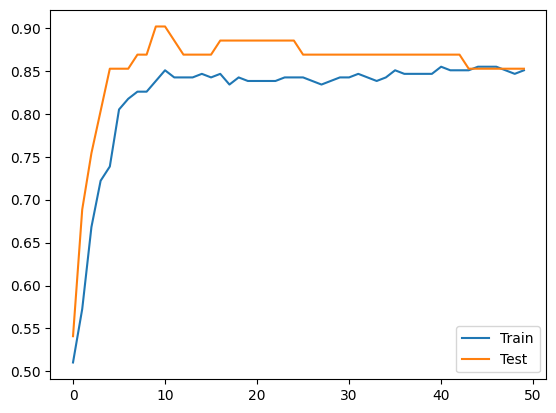

In [99]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')

# Adding legend
plt.legend()

# Showing plot
plt.show()


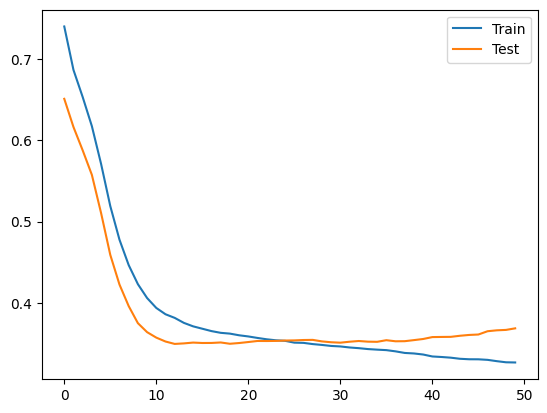

In [98]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')

# Adding legend
plt.legend()

# Showing plot
plt.show()


## 5. Model Prediction

In [100]:
# Prediction of Model
y_pred = model.predict(X_test)
y_pred


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step 


array([[0.02620635],
       [0.11726694],
       [0.76159203],
       [0.11370237],
       [0.89694804],
       [0.9757567 ],
       [0.77613485],
       [0.02004258],
       [0.01241185],
       [0.44874945],
       [0.7516982 ],
       [0.05567471],
       [0.92155   ],
       [0.12679188],
       [0.9992195 ],
       [0.96538234],
       [0.9998856 ],
       [0.01021585],
       [0.00764717],
       [0.02791625],
       [0.5027015 ],
       [0.02158072],
       [0.07931368],
       [0.7806594 ],
       [0.9802832 ],
       [0.86746675],
       [0.0204651 ],
       [0.6264852 ],
       [0.03503215],
       [0.98998743],
       [0.03254851],
       [0.04761615],
       [0.58850557],
       [0.12774813],
       [0.69310415],
       [0.04490696],
       [0.7662837 ],
       [0.6989556 ],
       [0.9252247 ],
       [0.897935  ],
       [0.45724696],
       [0.67770845],
       [0.7743111 ],
       [0.89833814],
       [0.8602173 ],
       [0.06606484],
       [0.87944853],
       [0.963

In [101]:
# Checking type
type(y_pred)

numpy.ndarray

In [104]:
# If a prediction is more than 0.5, calling it a 1 (yes), otherwise calling it a 0 (no)."
predictions = np.where(y_pred > 0.5, 1, 0)
predictions


array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1]])

## 6. Model Evaluation

In [107]:
# Importing necessary libraries for the evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

classification = classification_report(y_test, predictions)
conMat = confusion_matrix(y_test, predictions)
conMatDisplay = ConfusionMatrixDisplay(conMat)
roc = roc_auc_score(y_test, predictions)


In [109]:
# Printing
print(" Classification Report: ", classification)
print()
print(" Confusion Matrix: ", conMat)
print()
print(" ROC AUC Score: ", roc)


 Classification Report:                precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


 Confusion Matrix:  [[25  4]
 [ 5 27]]

 ROC AUC Score:  0.8529094827586207


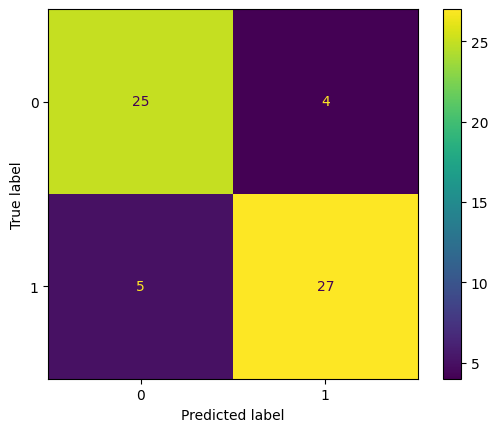

In [112]:
# Displaying Confusion Matrix
conMatDisplay.plot()
